### **Introduction to the Covertype Dataset**  

The **Covertype Dataset**, available in the **UCI Machine Learning Repository**, is a well-known dataset used for classification tasks in machine learning. It contains **581,012 instances** and **54 attributes**, primarily derived from cartographic variables such as elevation, soil type, and climatic conditions (Blackard & Dean, 1999). The dataset aims to predict the **forest cover type** (such as spruce-fir, lodgepole pine, or aspen) in the **Roosevelt National Forest in Colorado, USA** based on these environmental features.  

Due to its large size and mix of numerical and categorical data, the Covertype dataset is widely used for benchmarking classification algorithms, feature selection techniques, and deep learning models in forestry and environmental studies.  

### **Reference**  
- Blackard, J. A., & Dean, D. J. (1999). *Comparative accuracies of artificial neural networks and discriminant analysis in predicting forest cover types from cartographic variables*. Remote Sensing of Environment, 70(3), 322-336.  

Would you like me to expand on specific details?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline
import seaborn as sns
sns.set_theme(style='whitegrid')
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from scipy.stats import normaltest

seed=42

In [2]:
df = pd.read_csv('covtype.csv')

In [3]:
df.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points  ...  Soil_Type32  Soil_Type33  \
0                                6279  ...            0            0   
1                                6225  ...            0            0   
2                                6121  ...            0            0   
3                                6211  ...            0            0   
4                                6172  ...            0            0   

   Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type39  Soil_Type40  Cover_Type  
0            0            0           5  
1            0            0           5  
2            0            0           2  
3            0            0           2  
4            0            0           5  

[5 rows x 55 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [5]:
df.describe()

Elevation         Aspect          Slope  \
count  581012.000000  581012.000000  581012.000000   
mean     2959.365301     155.656807      14.103704   
std       279.984734     111.913721       7.488242   
min      1859.000000       0.000000       0.000000   
25%      2809.000000      58.000000       9.000000   
50%      2996.000000     127.000000      13.000000   
75%      3163.000000     260.000000      18.000000   
max      3858.000000     360.000000      66.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     581012.000000                   581012.000000   
mean                         269.428217                       46.418855   
std                          212.549356                       58.295232   
min                            0.000000                     -173.000000   
25%                          108.000000                        7.000000   
50%                          218.000000                       30.000000   
75%                          384.000000                       69.000000   
max                         1397.000000                      601.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                    581012.000000  581012.000000   581012.000000   
mean                       2350.146611     212.146049      223.318716   
std                        1559.254870      26.769889       19.768697   
min                           0.000000       0.000000        0.000000   
25%                        1106.000000     198.000000      213.000000   
50%                        1997.000000     218.000000      226.000000   
75%                        3328.000000     231.000000      237.000000   
max                        7117.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  ...    Soil_Type32  \
count  581012.000000                       581012.000000  ...  581012.000000   
mean      142.528263                         1980.291226  ...       0.090392   
std        38.274529                         1324.195210  ...       0.286743   
min         0.000000                            0.000000  ...       0.000000   
25%       119.000000                         1024.000000  ...       0.000000   
50%       143.000000                         1710.000000  ...       0.000000   
75%       168.000000                         2550.000000  ...       0.000000   
max       254.000000                         7173.000000  ...       1.000000   

         Soil_Type33    Soil_Type34    Soil_Type35    Soil_Type36  \
count  581012.000000  581012.000000  581012.000000  581012.000000   
mean        0.077716       0.002773       0.003255       0.000205   
std         0.267725       0.052584       0.056957       0.014310   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

         Soil_Type37    Soil_Type38    Soil_Type39    Soil_Type40  \
count  581012.000000  581012.000000  581012.000000  581012.000000   
mean        0.000513       0.026803       0.023762       0.015060   
std         0.022641       0.161508       0.152307       0.121791   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

          Cover_Type  
count  581012.000000  
mean        2.051471  
std         1.396504  
min         1.000000  
25%         1.000000  
50%         2.000000  
75%         2.000000  
max         7.000000  

[8 rows x 55 colu

In [6]:
df.isnull().any(axis=0).any()

False

In [7]:
df.duplicated().any()

False

In [8]:
new_df = df.copy()

### Decoding Wilderness Feature

In [9]:
wilderness_columns = ['Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4']

In [10]:
wilderness = df[wilderness_columns]

In [11]:
wilderness_maps = {
        'Wilderness_Area1': 'Rawah',
        'Wilderness_Area2': 'Neota',
        'Wilderness_Area3': 'Comanche',
        'Wilderness_Area4': 'Cache la Poudre'
             }

In [12]:
new_df.drop(columns=wilderness_columns,inplace=True)
new_df.insert(10,'Wilderness',wilderness.idxmax(axis=1).map(wilderness_maps))

In [13]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 52 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Elevation                           581012 non-null  int64 
 1   Aspect                              581012 non-null  int64 
 2   Slope                               581012 non-null  int64 
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64 
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64 
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64 
 6   Hillshade_9am                       581012 non-null  int64 
 7   Hillshade_Noon                      581012 non-null  int64 
 8   Hillshade_3pm                       581012 non-null  int64 
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64 
 10  Wilderness                          581012 non-null  object
 11  Soil_Type1                          581

### Decoding Soil Type Feature

In [14]:
soil_type = new_df.iloc[:,11:51].idxmax(axis=1)

In [15]:
new_df.drop(columns = new_df.columns[11:51],inplace=True)
new_df.insert(11,'Soil_Type',soil_type)

In [16]:
new_df.Soil_Type = new_df.Soil_Type.str.replace('Soil_Type','').astype('int')

### Naming Cover Types

In [17]:
new_df.Cover_Type.unique()

array([5, 2, 1, 7, 3, 6, 4], dtype=int64)

In [18]:
cover_maping = {
            1 : 'Spruce/Fir',
            2 : 'Lodgepole Pine',
            3 : 'Ponderosa Pine',
            4 : 'Cottonwood/Willow',
            5 : 'Aspen',
            6 : 'Douglas-fir',
            7 : 'Krummholz'
}

new_df.Cover_Type = new_df.Cover_Type.map(cover_maping)

In [19]:
new_df.Cover_Type.unique()

array(['Aspen', 'Lodgepole Pine', 'Spruce/Fir', 'Krummholz',
       'Ponderosa Pine', 'Douglas-fir', 'Cottonwood/Willow'], dtype=object)

In [20]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 13 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Elevation                           581012 non-null  int64 
 1   Aspect                              581012 non-null  int64 
 2   Slope                               581012 non-null  int64 
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64 
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64 
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64 
 6   Hillshade_9am                       581012 non-null  int64 
 7   Hillshade_Noon                      581012 non-null  int64 
 8   Hillshade_3pm                       581012 non-null  int64 
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64 
 10  Wilderness                          581012 non-null  object
 11  Soil_Type                           581

In [21]:
new_df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness', 'Soil_Type',
       'Cover_Type'],
      dtype='object')

In [22]:
num_cols = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points']
cat_cols = ['Wilderness', 'Soil_Type', 'Cover_Type']

In [23]:
cov_val_count=new_df.Cover_Type.value_counts(normalize=True)
labels = [f'{idx}\n{(val*100):.2f}%' for idx,val in zip(cov_val_count.index,cov_val_count.values)]

In [24]:
new_df.Cover_Type.value_counts(normalize=True).sort_index()

Cover_Type
Aspen                0.016339
Cottonwood/Willow    0.004728
Douglas-fir          0.029891
Krummholz            0.035300
Lodgepole Pine       0.487599
Ponderosa Pine       0.061537
Spruce/Fir           0.364605
Name: proportion, dtype: float64

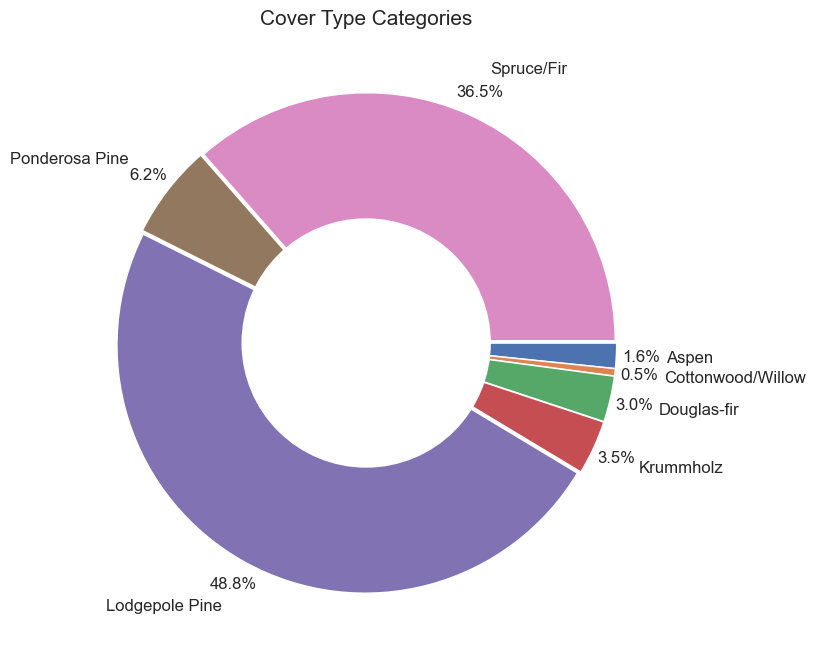

In [25]:
cov_val_count=new_df.Cover_Type.value_counts(normalize=True).sort_index()
fig, ax = plt.subplots(1,1,figsize=(8,15))
ax.pie(cov_val_count,
        autopct='%1.1f%%',
        pctdistance=1.1,
        textprops={'size':12},
        labels=cov_val_count.index,
        labeldistance=1.2,
        counterclock=False,
        explode=[0.01]*new_df.Cover_Type.nunique())
ax.add_artist(plt.Circle((0,0),0.50,fc='white'))
ax.set_title('Cover Type Categories',fontsize=15)
plt.show()

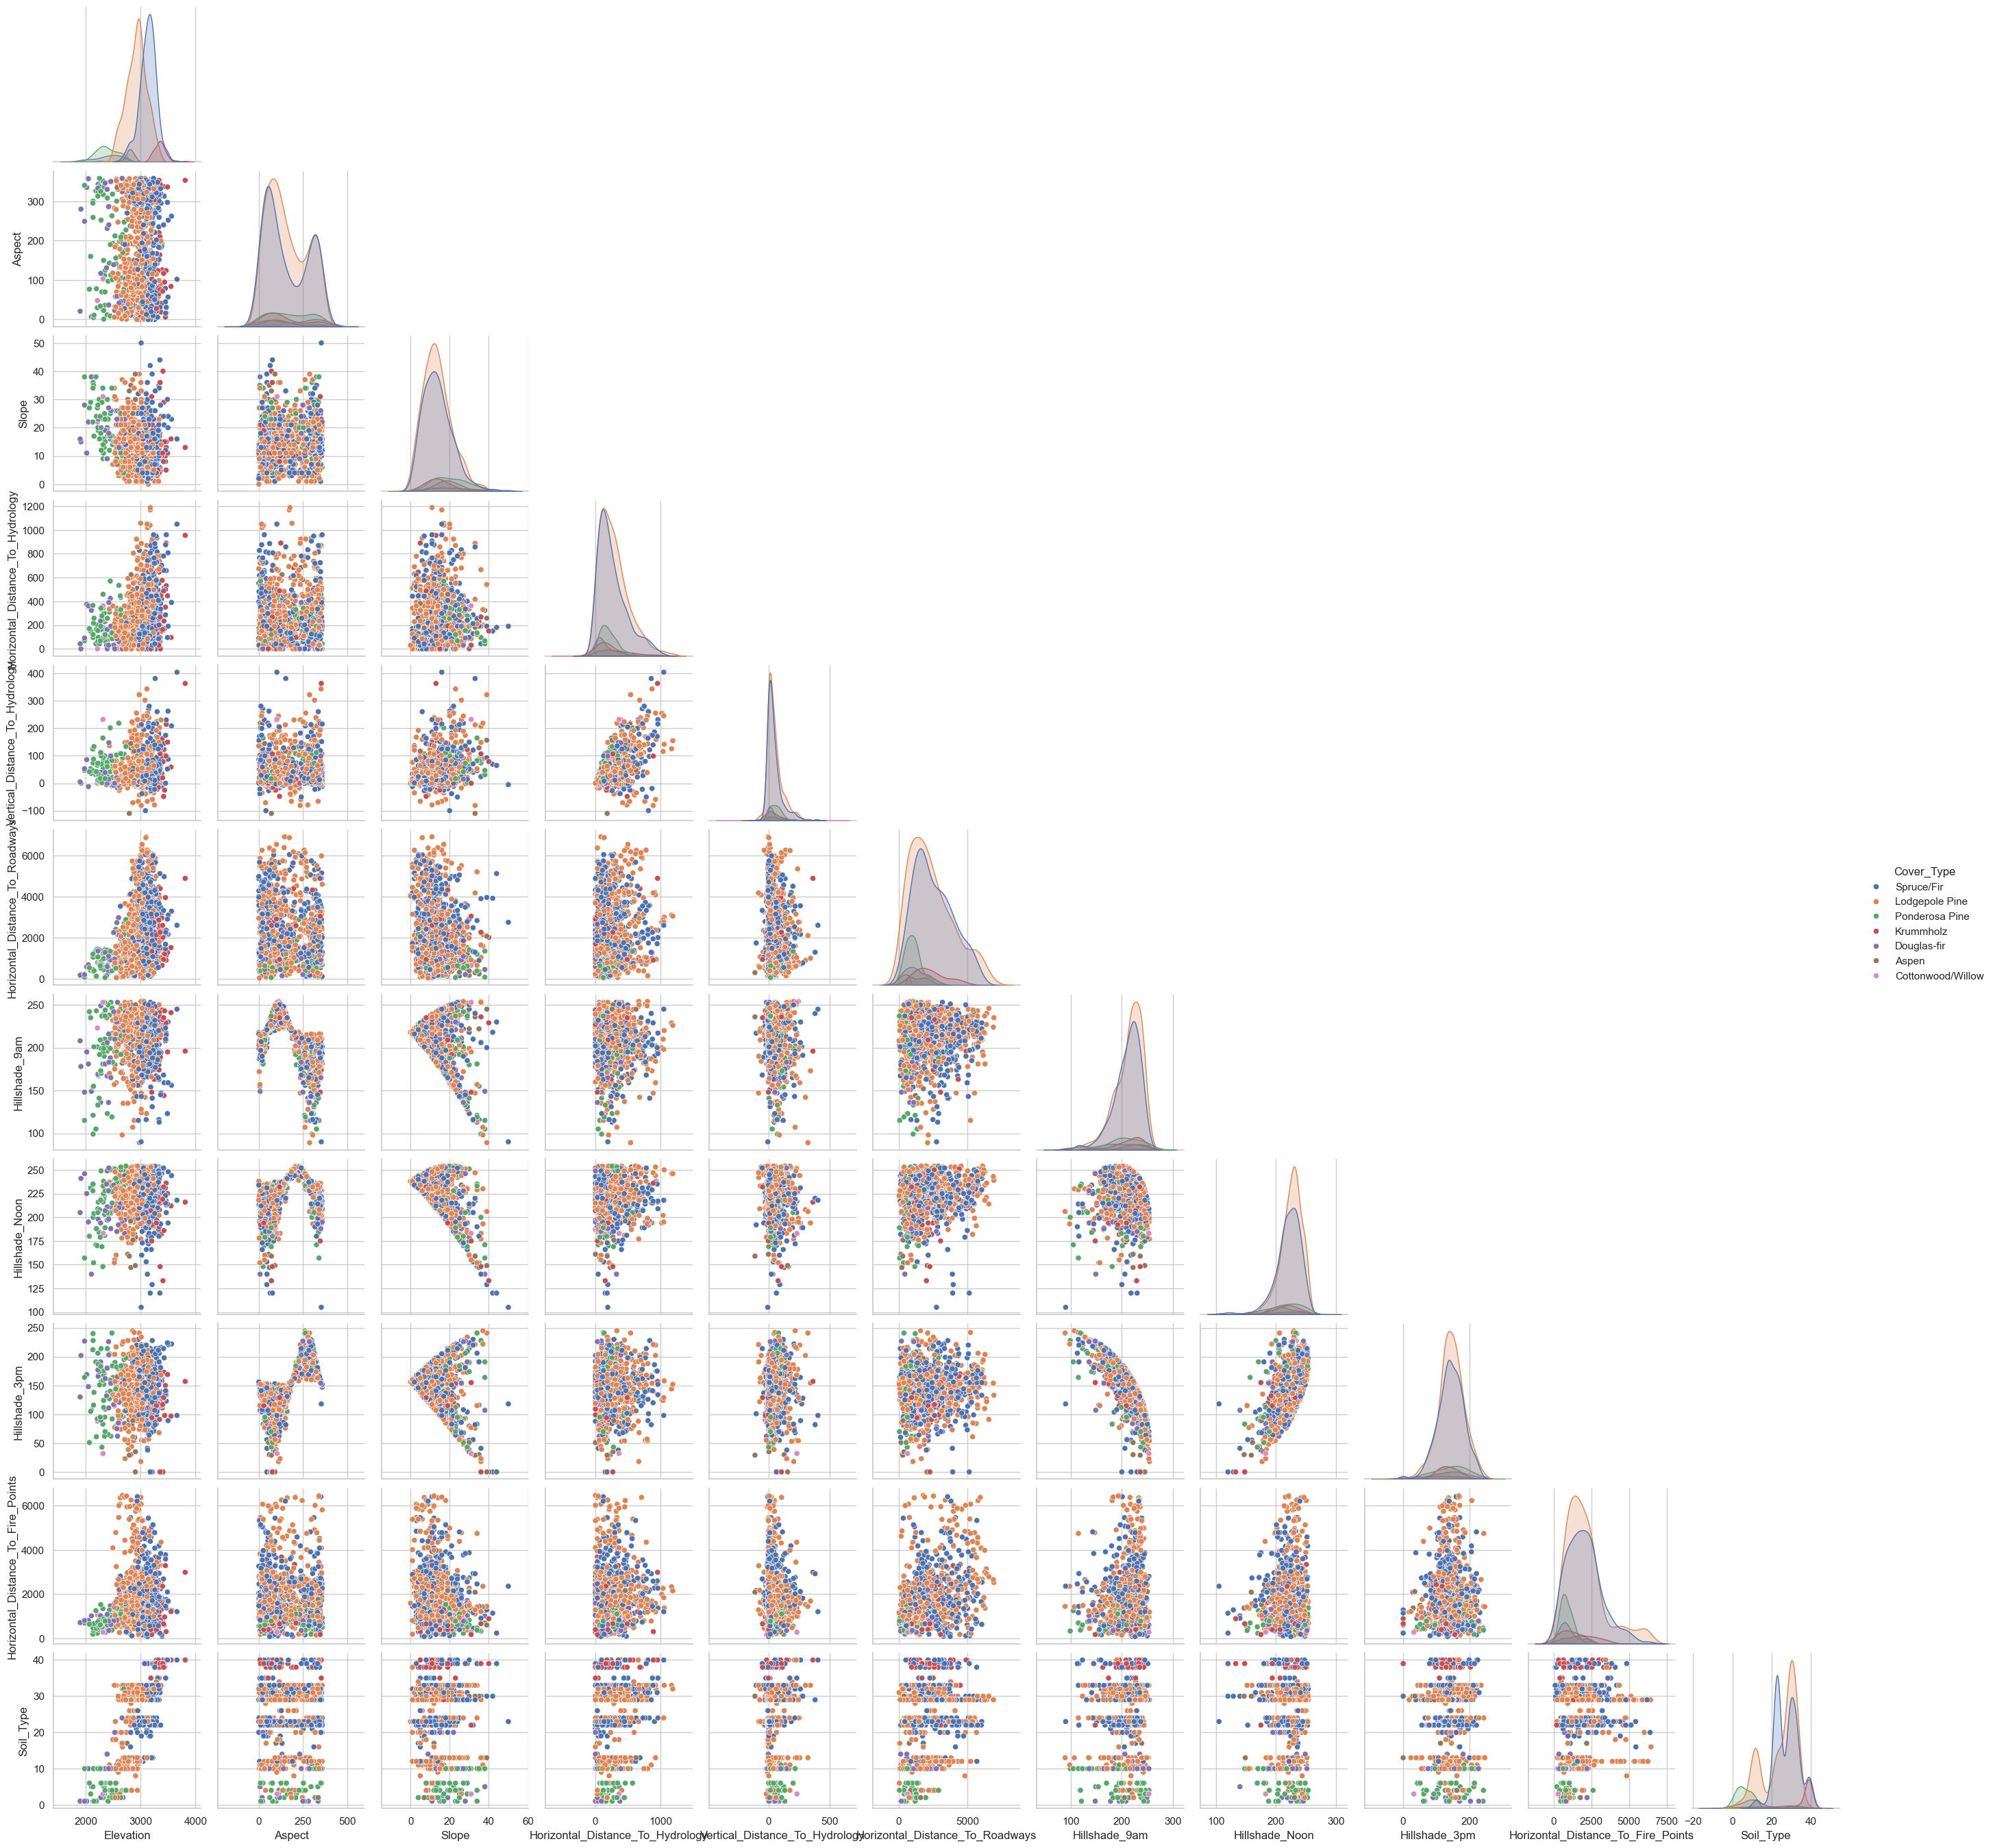

In [26]:
sns.pairplot(new_df.sample(1000),hue='Cover_Type',corner=True)
plt.show()

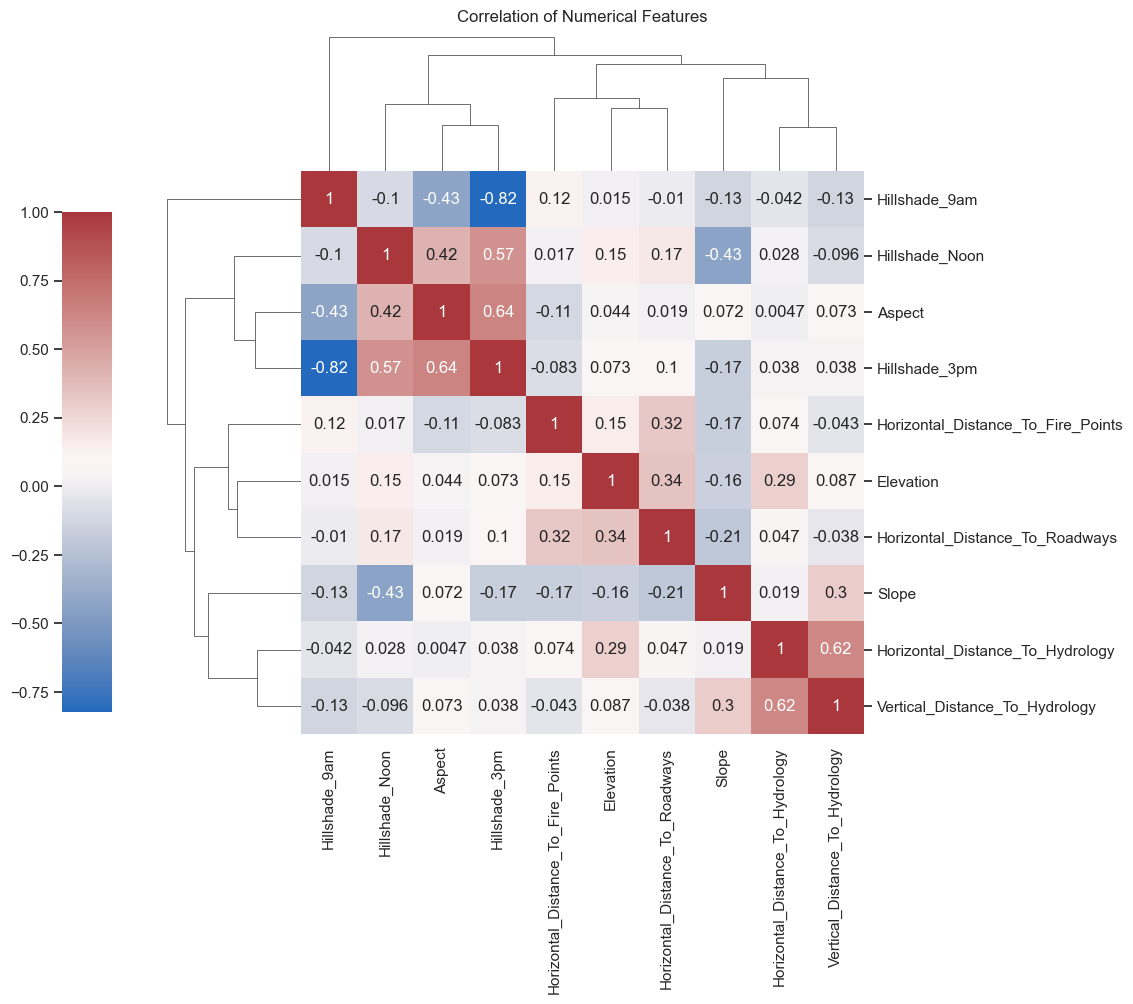

In [27]:
clst = sns.clustermap(new_df[num_cols].corr(method='spearman'),annot=True,cmap='vlag',cbar_pos=(-0.08, 0.3, 0.05, 0.5))
clst.ax_cbar.yaxis.set_ticks_position('left')
clst.ax_col_dendrogram.set_title('Correlation of Numerical Features')
plt.show()

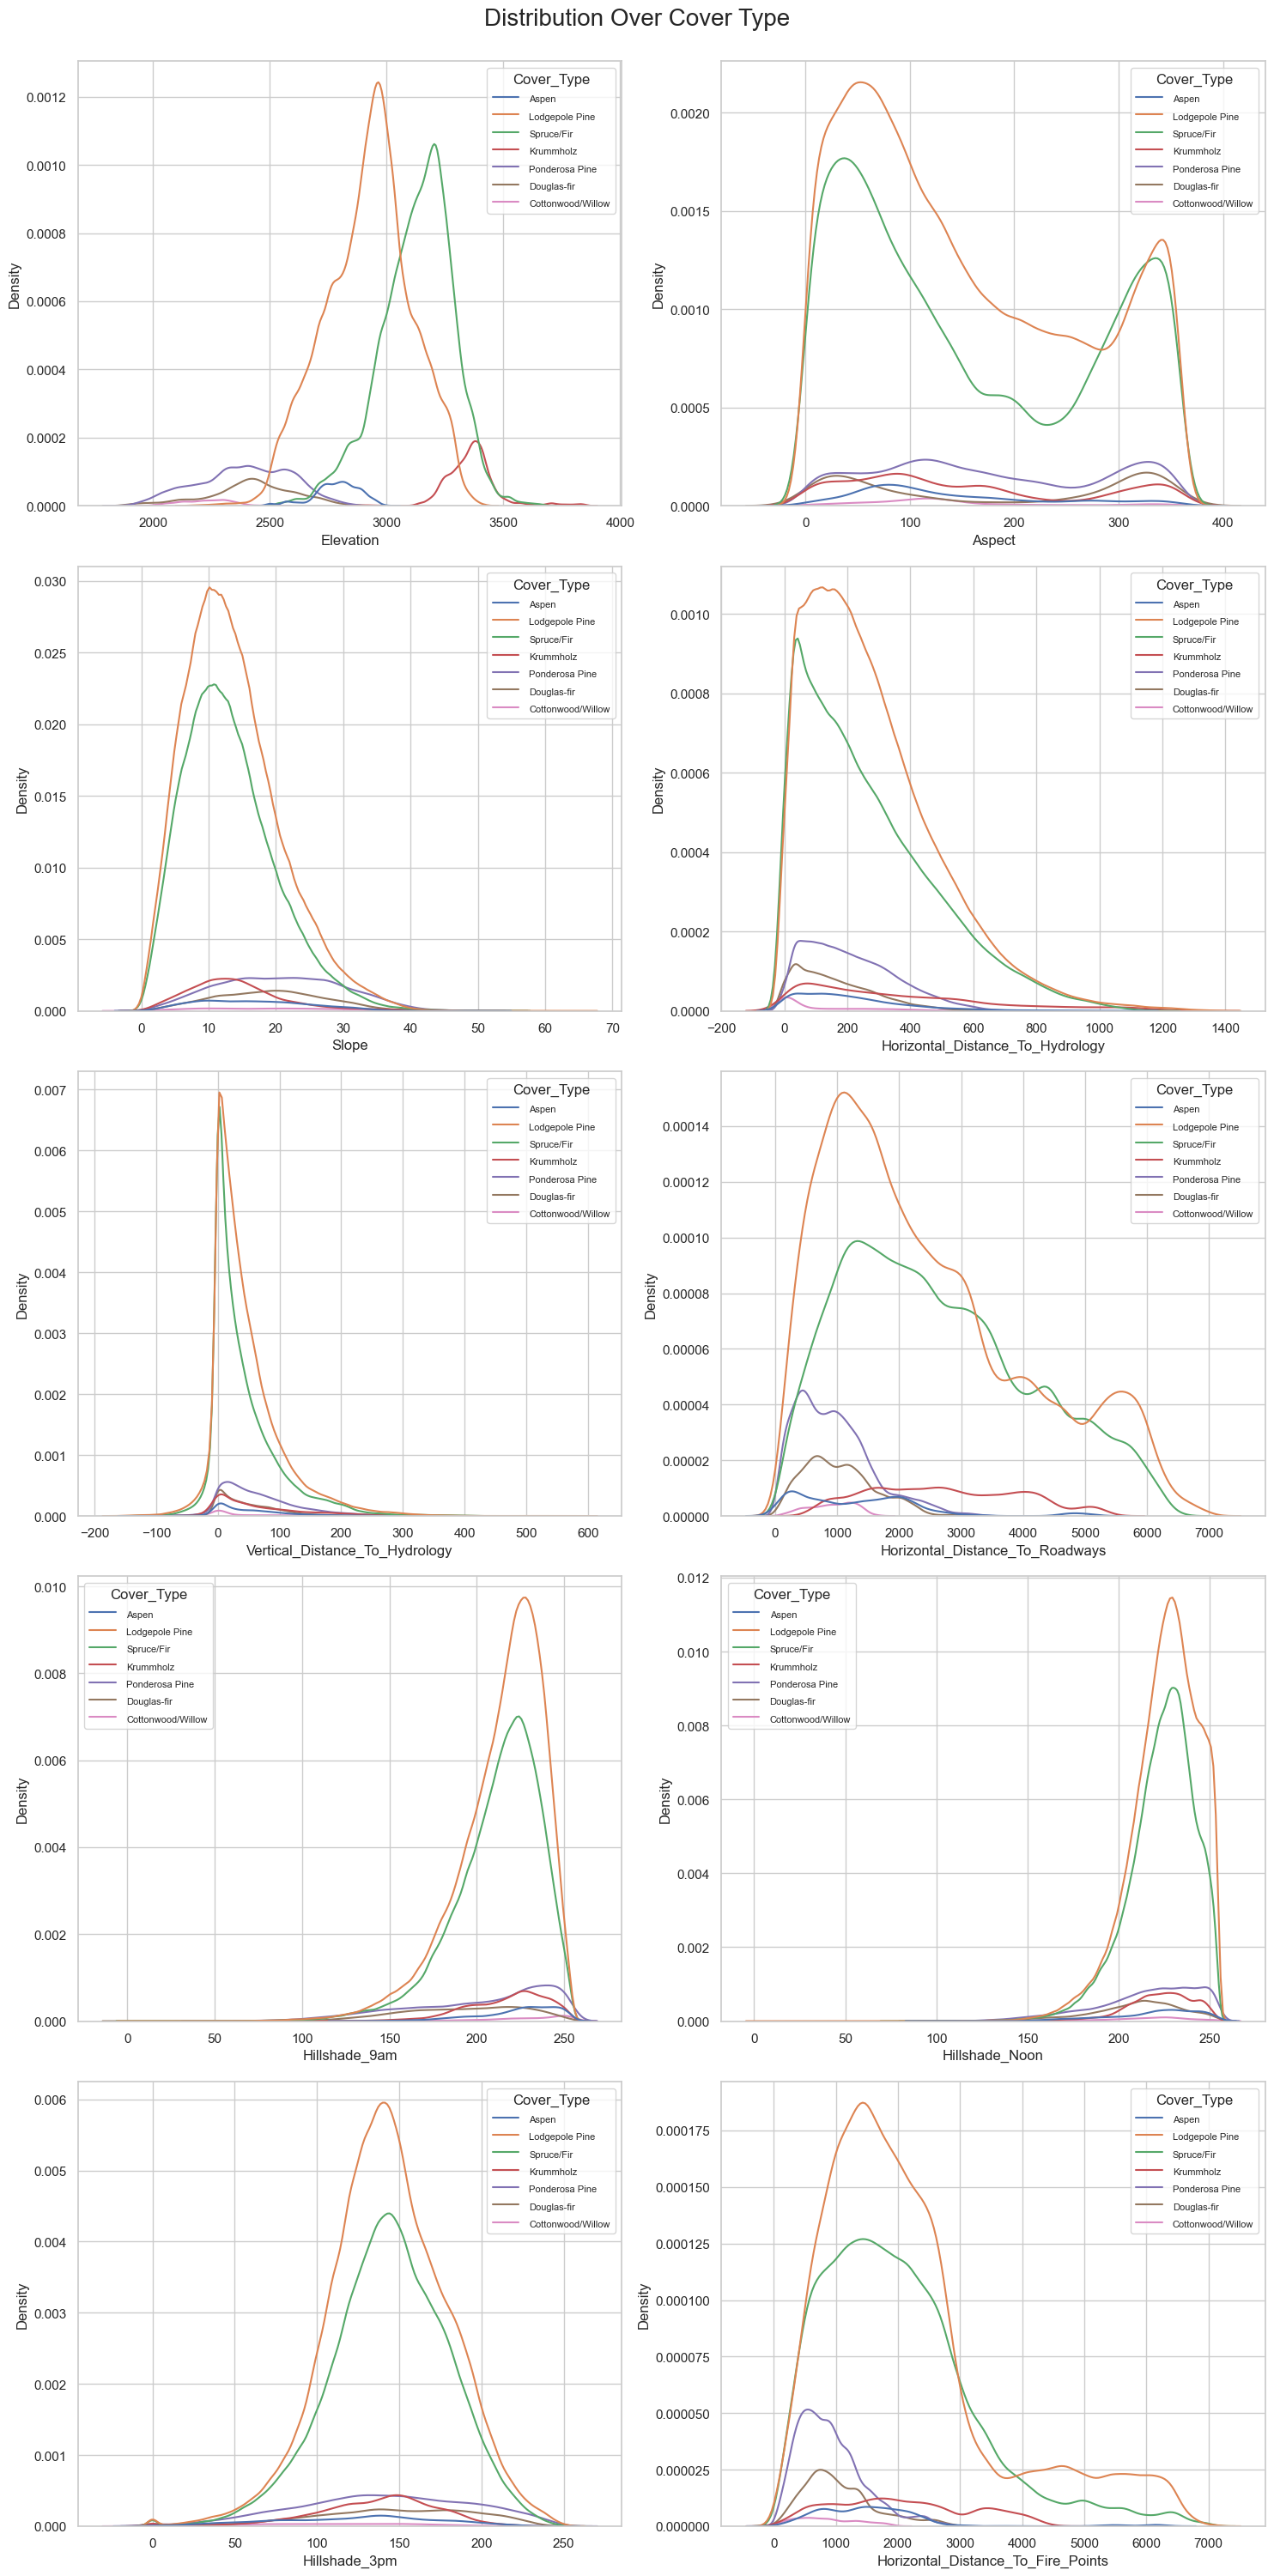

In [28]:
fig, axes = plt.subplots(5,2,figsize=(15,30))
axes = axes.flatten()
for i in range(len(num_cols)):
    kde = sns.kdeplot(new_df,x=num_cols[i],hue='Cover_Type',ax=axes[i])  
    plt.setp(kde.get_legend().get_texts(),fontsize=8)
plt.suptitle('Distribution Over Cover Type',y=1,fontsize=20)
plt.tight_layout()
plt.show()

In [29]:
def check_normal_distribution(df):
    df = df.select_dtypes('number')
    test_result = normaltest(df)
    test_df = pd.DataFrame({'Columns':df.columns,
                            'Statistics': test_result.statistic,
                            'pvalue':test_result.pvalue,
                            'noramlly distributed':test_result.pvalue > 0.5})
    def row_color(row):
        green = 'background-color:#75ff86'
        red = 'background-color:#ff7575'
        return [green if row['noramlly distributed'] == True else red for _ in row]
    styled_df = test_df.style.apply(row_color,axis=1)
    
    return styled_df

In [30]:
check_normal_distribution(new_df)

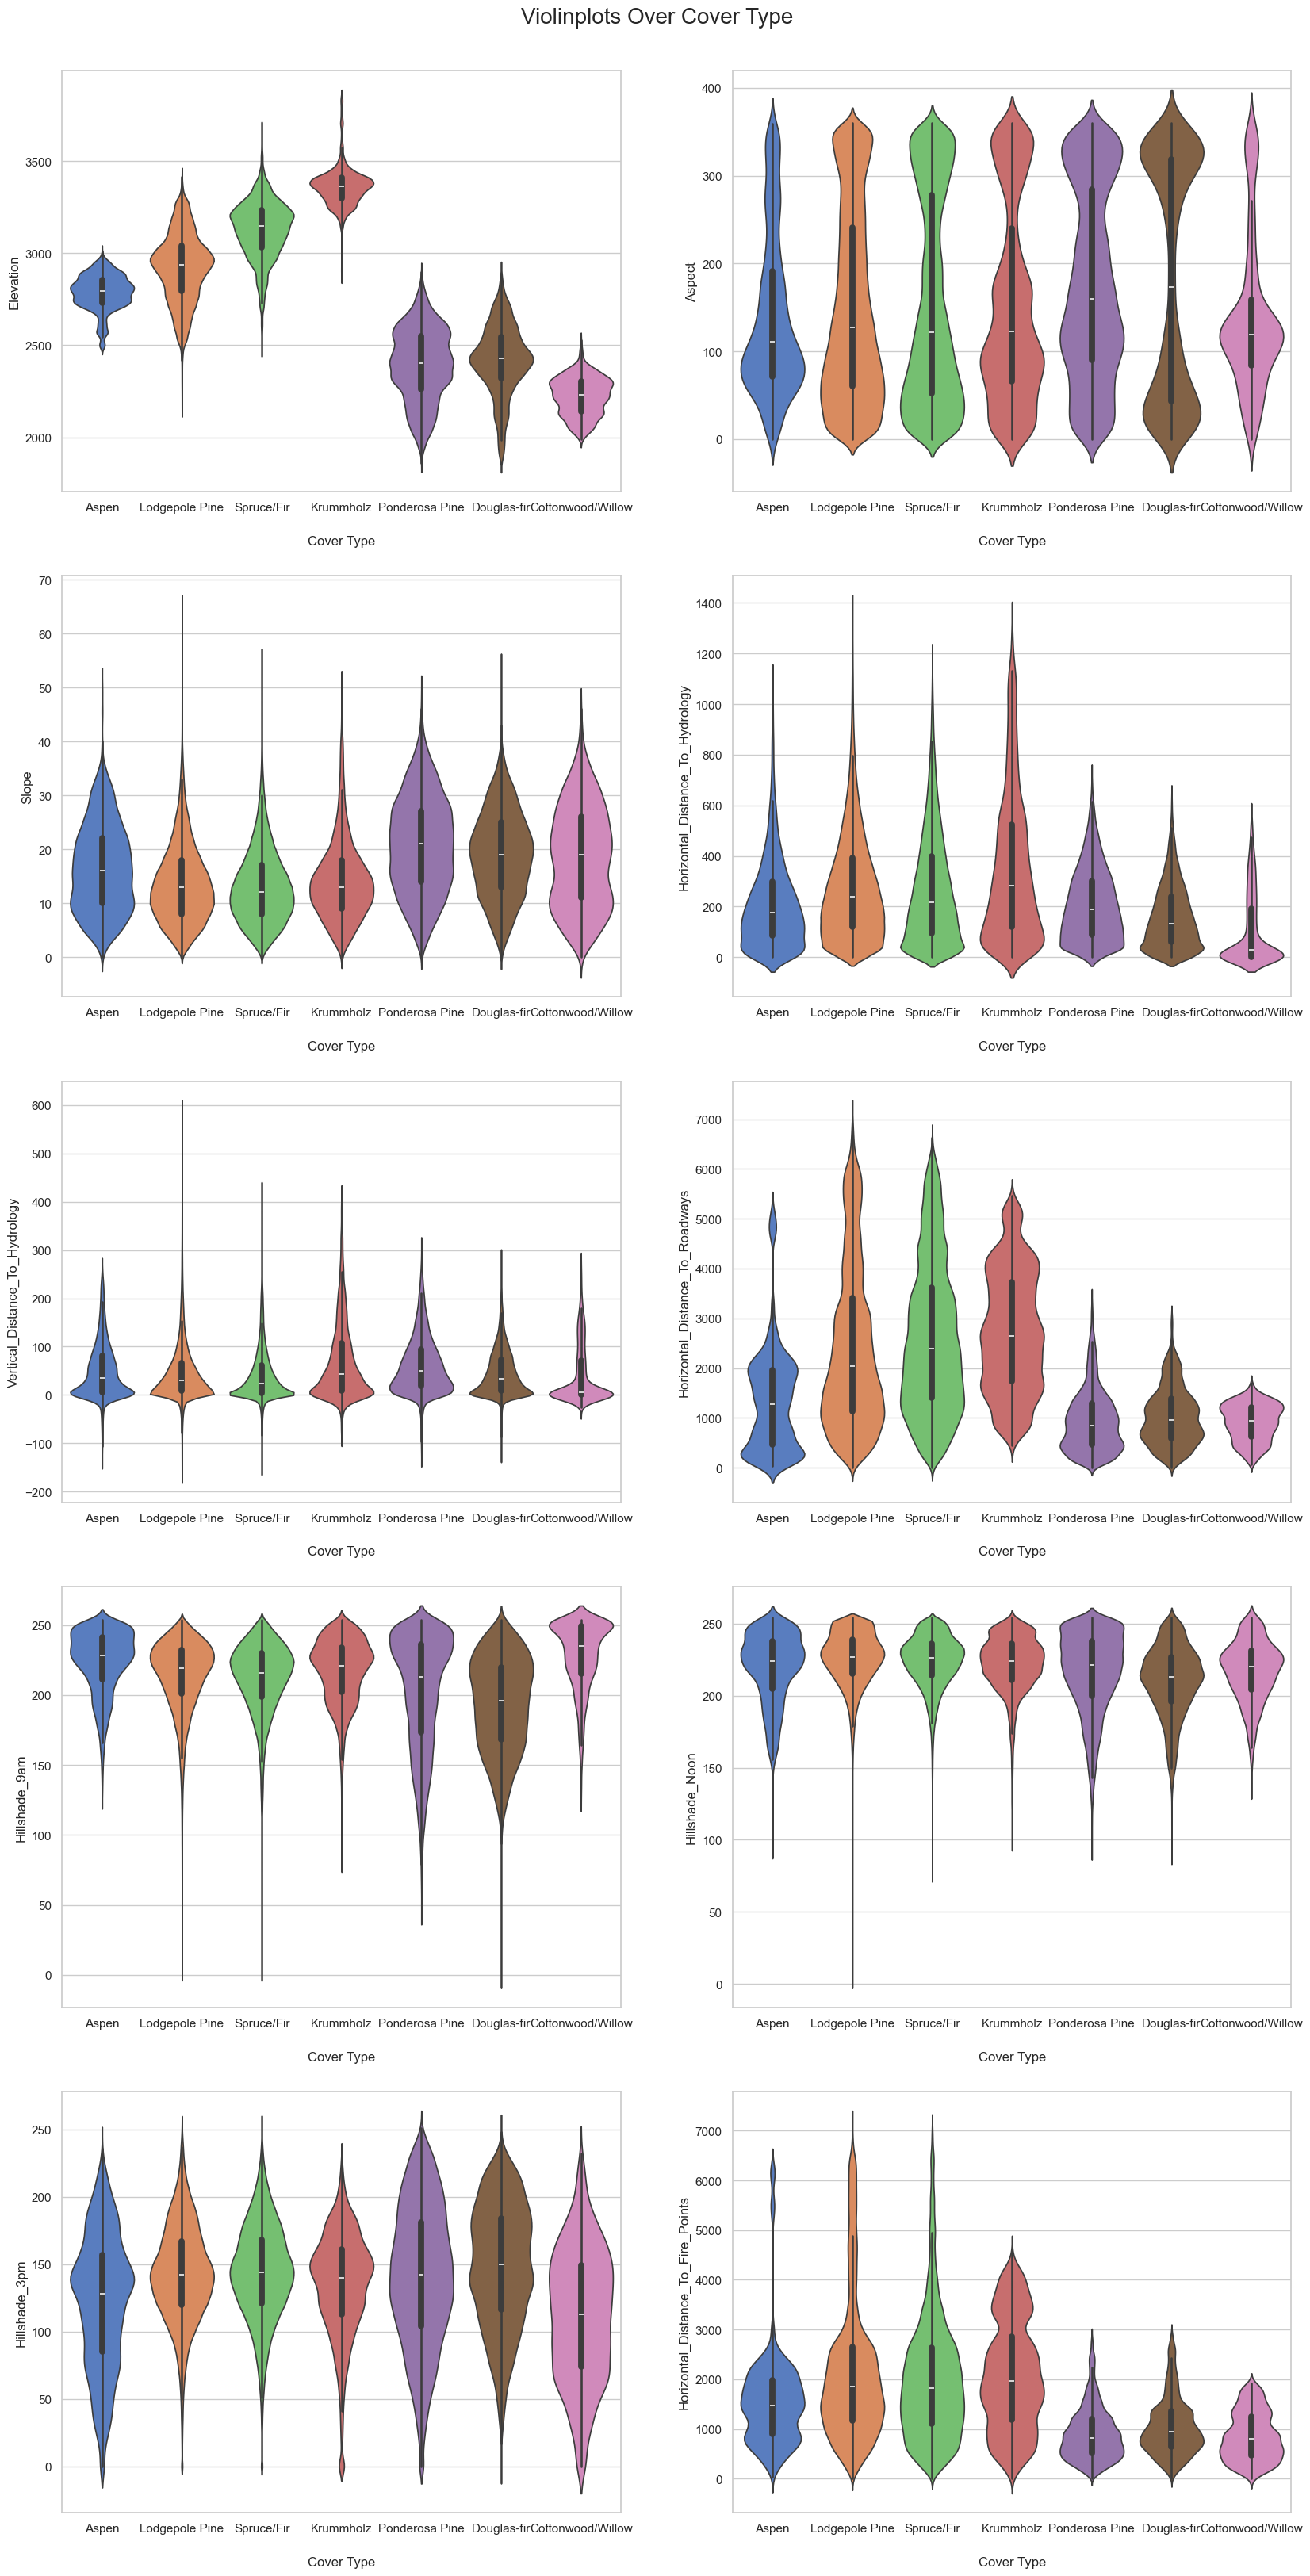

In [31]:
plt.figure(figsize=(20,40))
sns.set_theme(style='whitegrid')

for i in range(len(num_cols)):
    plt.subplot(5,2,i+1)
    sns.violinplot(new_df,
                   x='Cover_Type',
                   y=num_cols[i],
                   hue='Cover_Type',
                   palette='muted')
    plt.ylabel(num_cols[i])
    plt.xlabel('Cover Type',labelpad=20)
plt.suptitle('Violinplots Over Cover Type',y=.9,fontsize=20)
plt.show()

In [32]:
def cramersv_corr(df):
    df = df.astype('object')
    cols = df.columns
    corr = pd.DataFrame(columns=cols,index=cols)
    for i in range(len(df.columns)):
        for j in range(i,len(cols)):
            col1 = cols[i]
            col2 = cols[j]
            contingency_table = pd.crosstab(df[col1],df[col2])
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            n = contingency_table.sum().sum() 
            min_dim = min(contingency_table.shape) - 1  
            cramersv = np.sqrt(chi2 / (n * min_dim))
            corr.loc[cols[i],cols[j]]=corr.loc[cols[j],cols[i]] = cramersv
    return corr.astype('float')

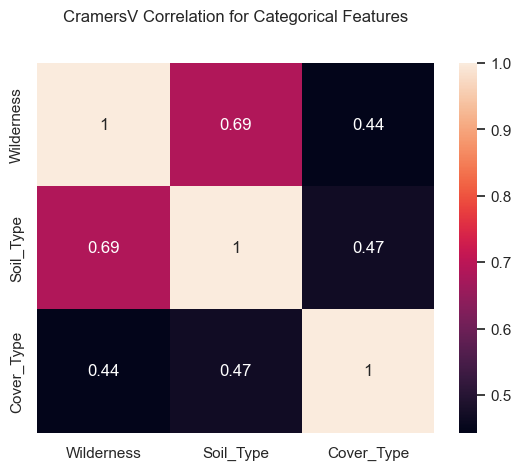

In [33]:
sns.heatmap(cramersv_corr(new_df[cat_cols]),annot=True)
plt.title('CramersV Correlation for Categorical Features',pad=30)
plt.show()

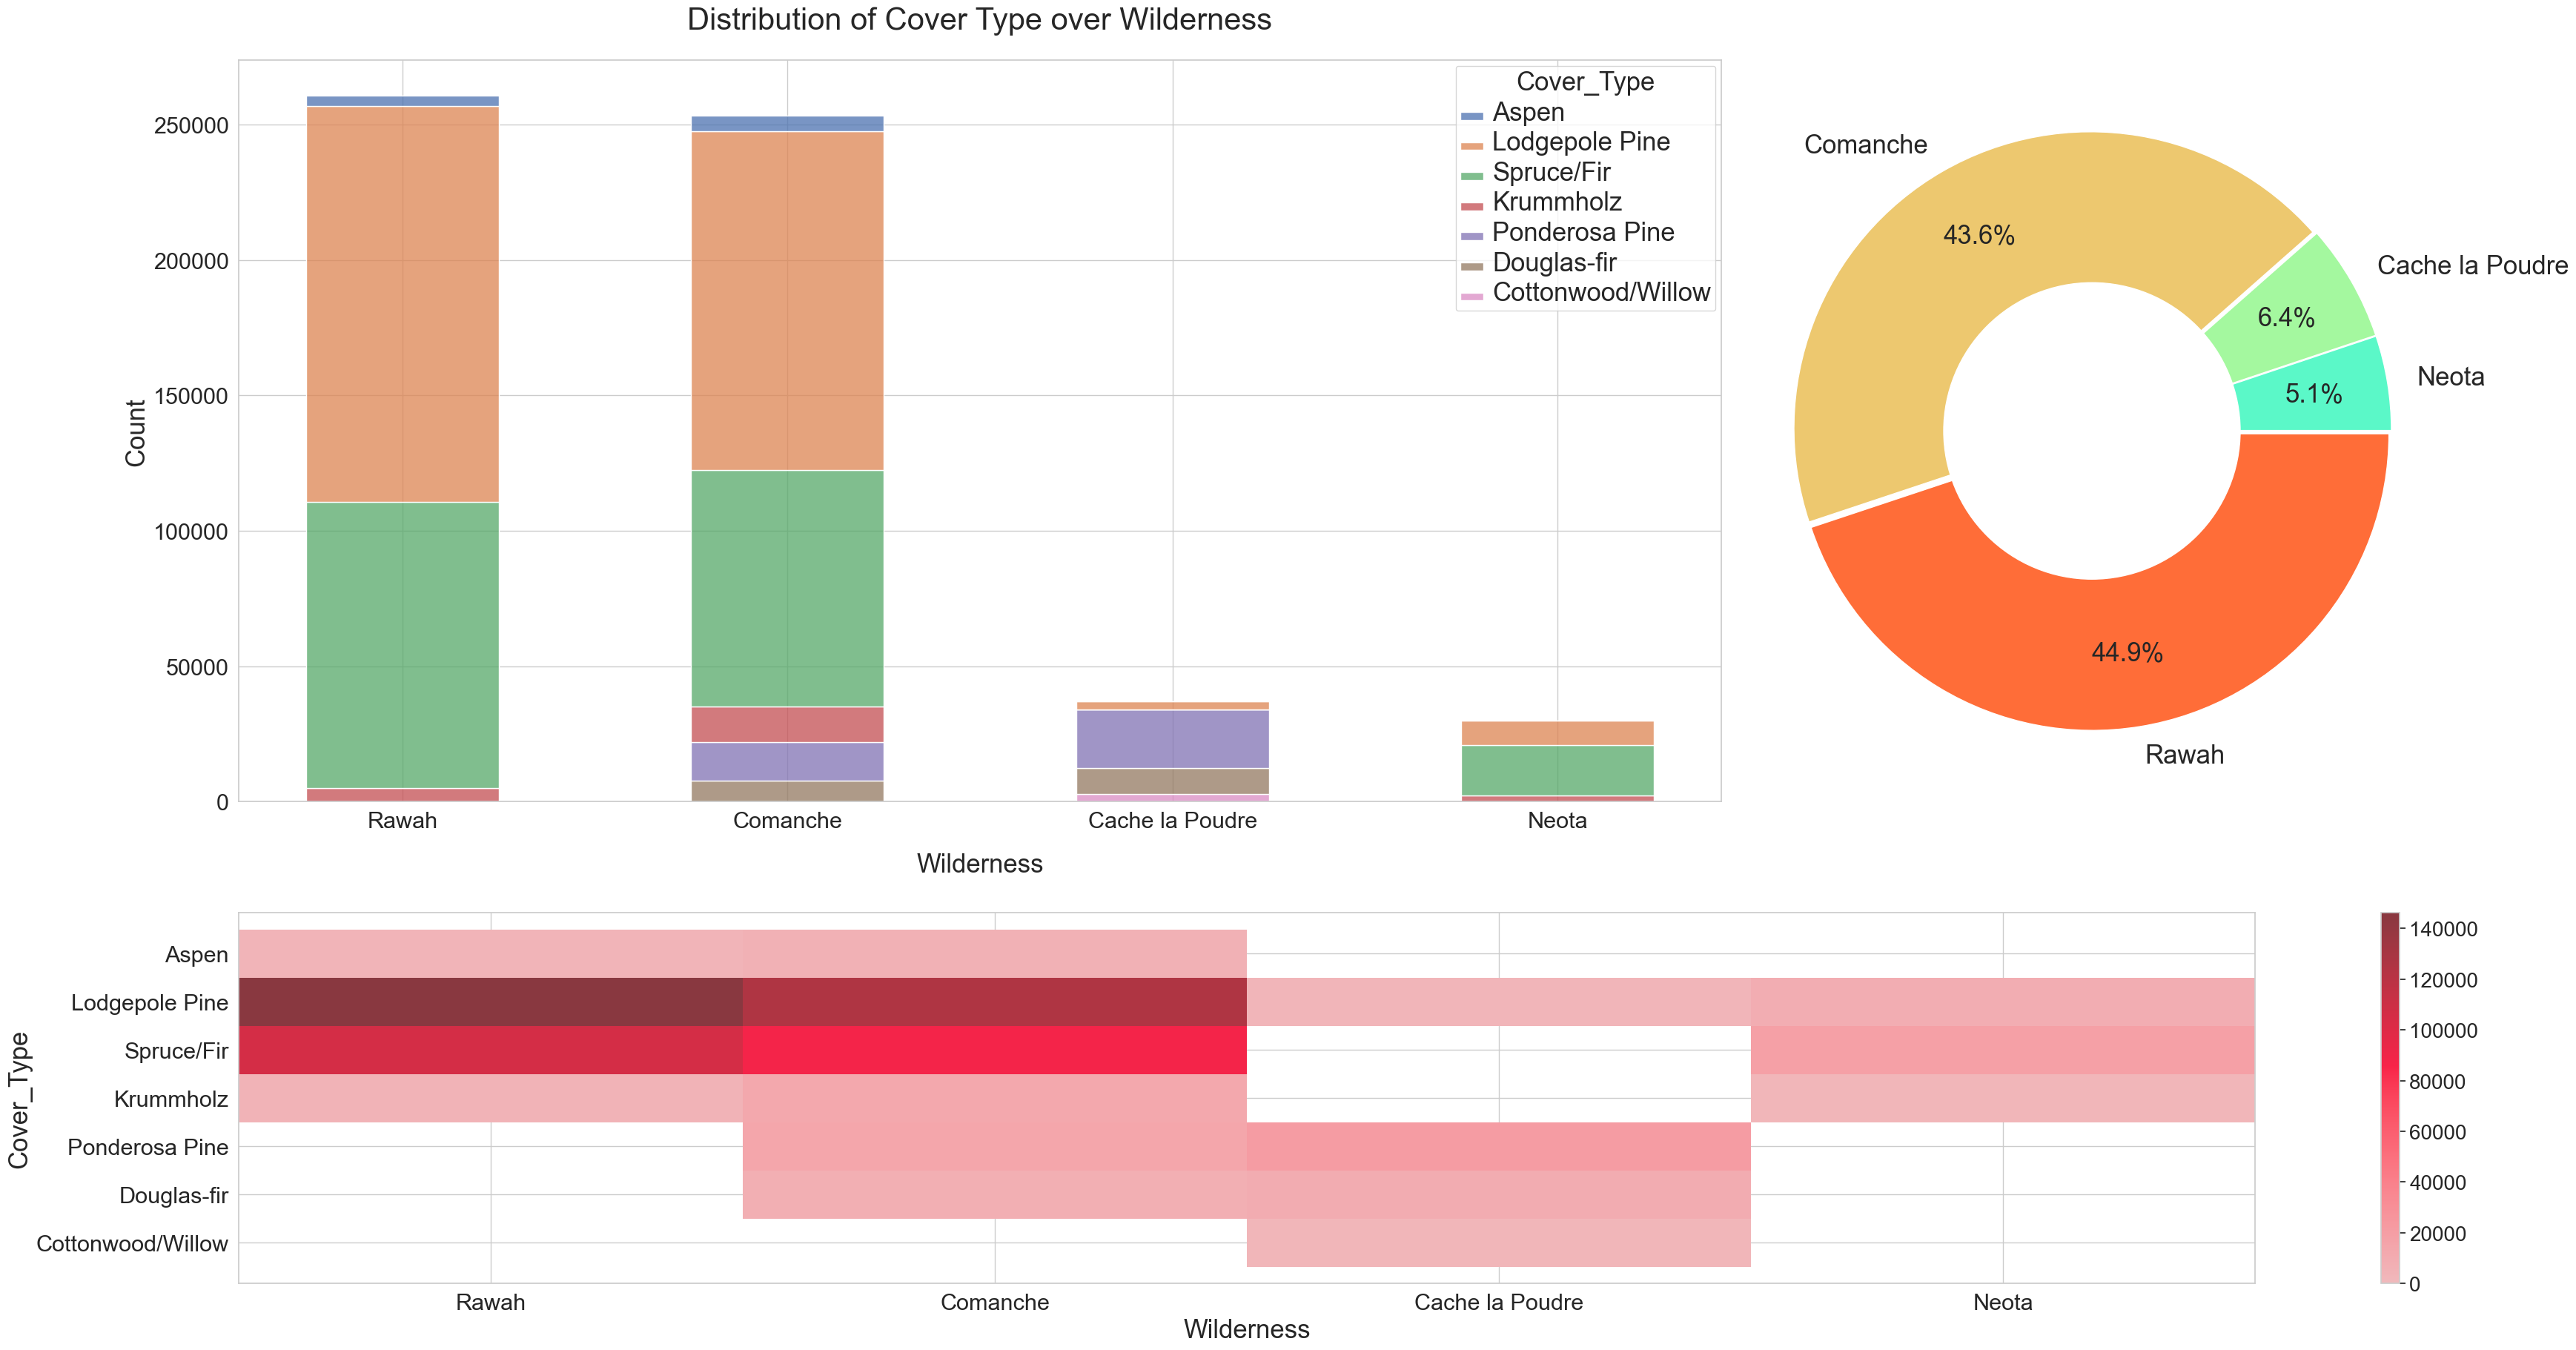

In [34]:
fig = plt.figure(figsize=(20,5))

ax0 = fig.add_axes([0,0,1,2])
wild_cov = new_df[['Wilderness', 'Cover_Type']]
sns.histplot(wild_cov,x='Wilderness',hue='Cover_Type',multiple='stack',shrink=.5)
ax0.tick_params(axis='both',labelsize=22,rotation=0)
ax0.set_xlabel(ax0.get_xlabel(),fontsize=25,labelpad=20)
ax0.set_ylabel(ax0.get_ylabel(),fontsize=25)
plt.setp(ax0.get_legend().get_texts(),fontsize=25)
plt.setp(ax0.get_legend().get_title(),fontsize=25)
ax0.set_title('Distribution of Cover Type over Wilderness',pad=30,fontsize=30)

ax1 = fig.add_axes([1,0,0.5,2])
val_count = new_df.Wilderness.value_counts()
ax1.pie(val_count,
        autopct='%1.1f%%',
        pctdistance=0.75,
        explode=[0.01]*new_df.Wilderness.nunique(),
        textprops={'size':25},
        labels=val_count.index,
        counterclock=False,
        colors=sns.color_palette("rainbow_r")[0:5])
ax1.add_artist(plt.Circle((0,0),0.50,fc='white'))

ax2 = fig.add_axes([0,-1.3,1.7,1])
sns.histplot(data=new_df,x='Wilderness',y='Cover_Type',color='crimson',
             cbar=True
            )
ax2.set_xlabel(ax2.get_xlabel(),fontsize=25)
ax2.set_ylabel(ax2.get_ylabel(),fontsize=25)
ax2.tick_params(axis='both',labelsize=22,rotation=0)
ax2.set_xlim(-.5,3.5)
ax2.figure.axes[-1].tick_params(labelsize=20)
plt.show()

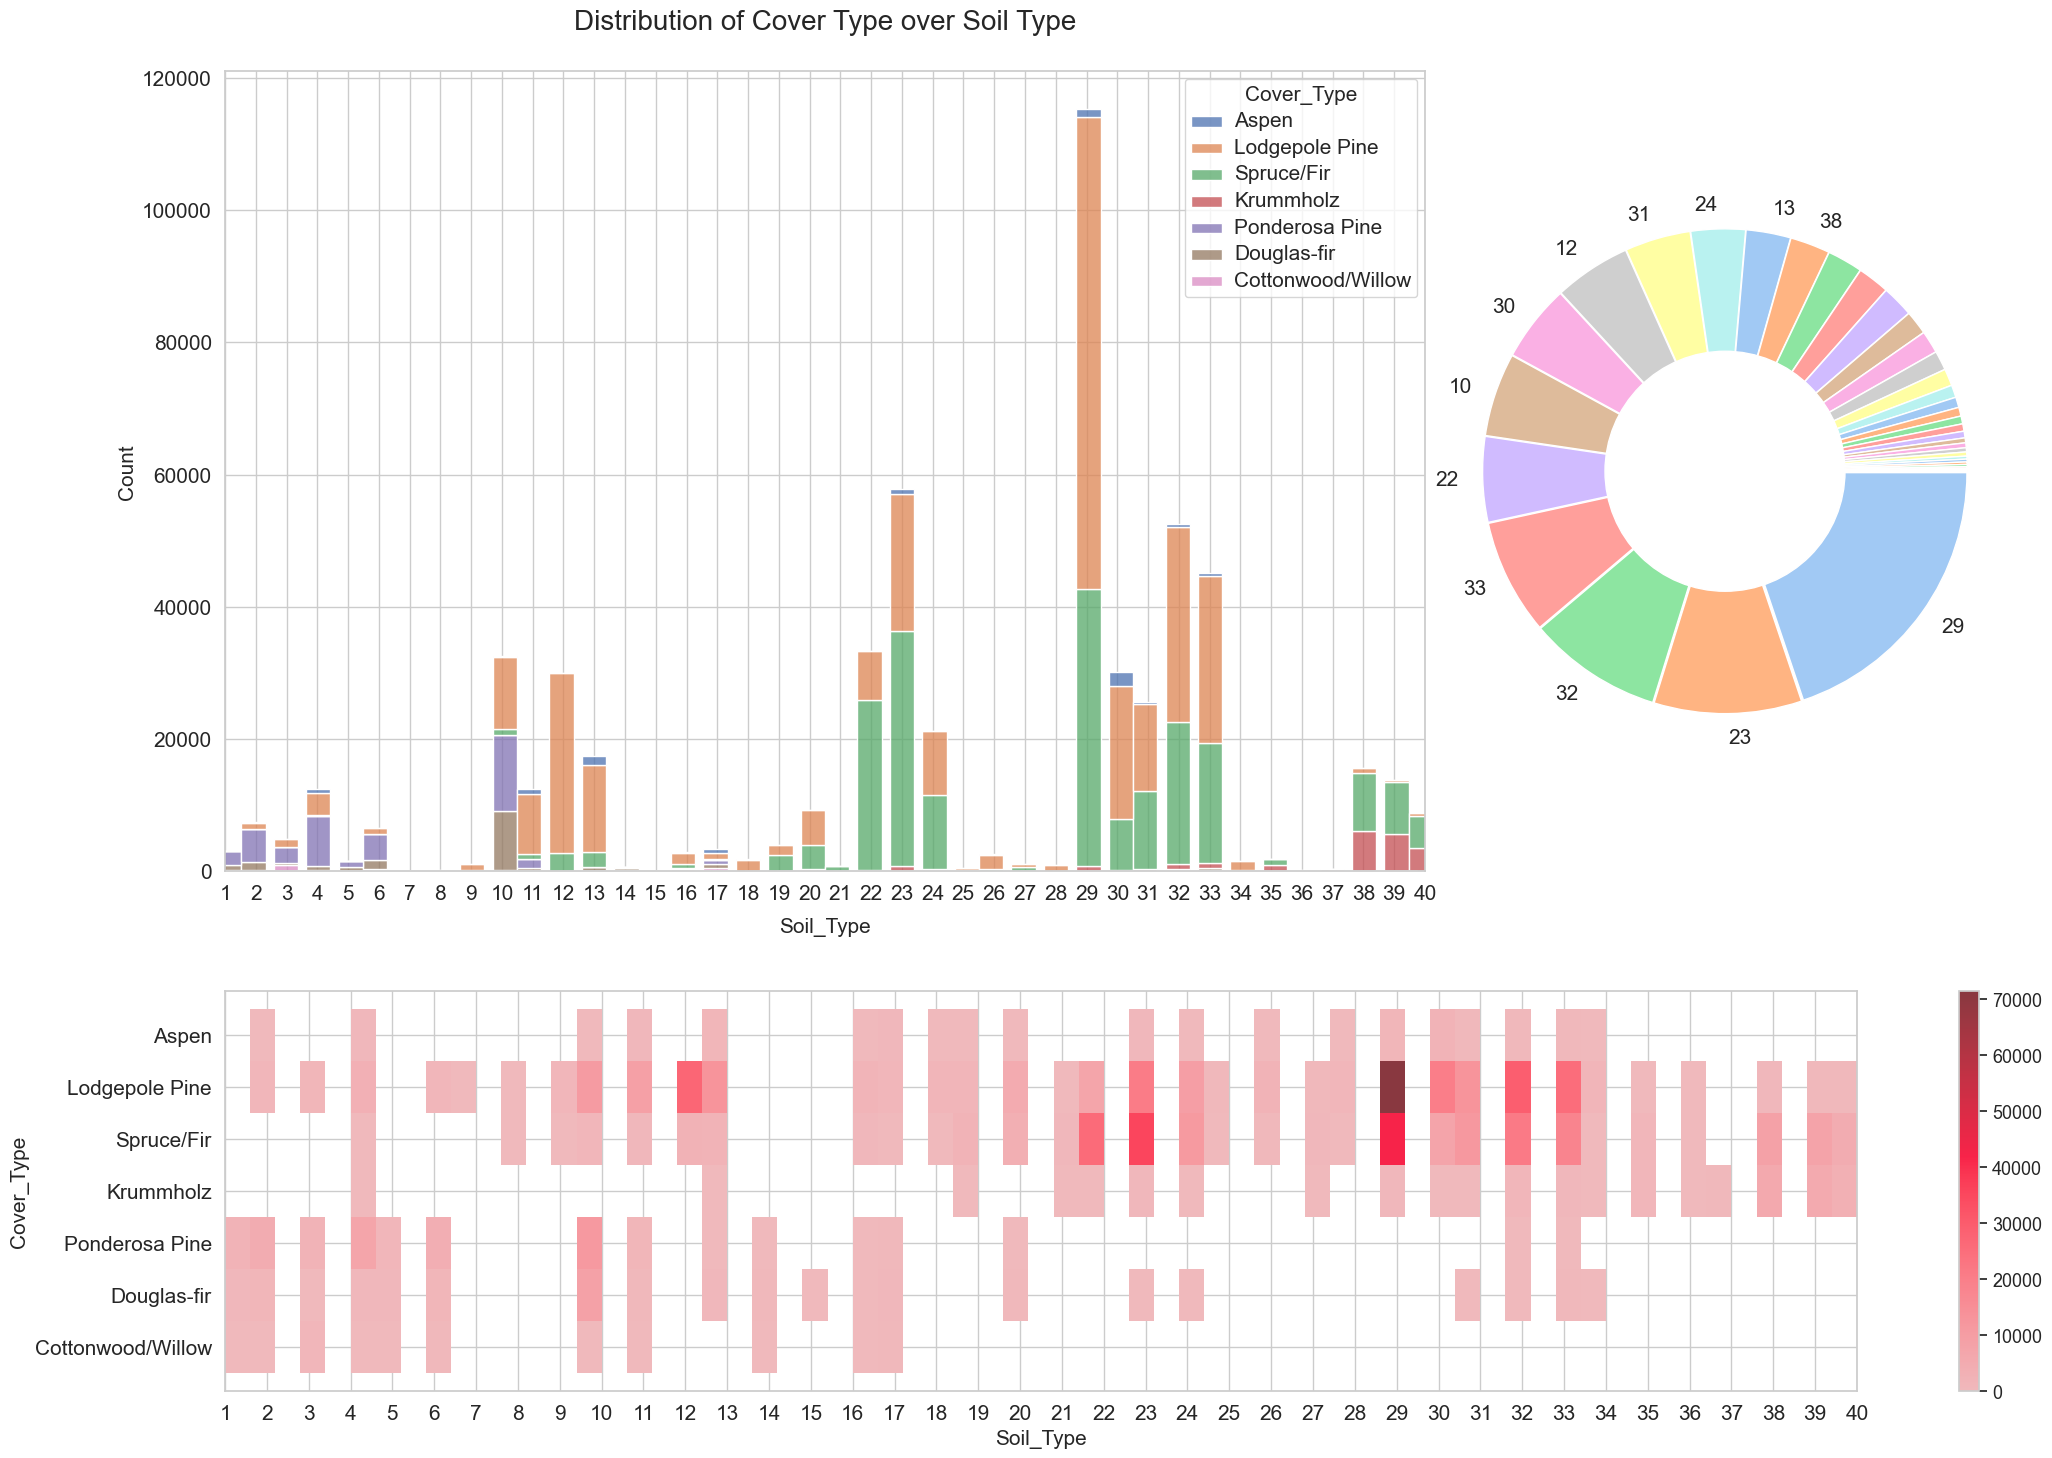

In [35]:
fig = plt.figure(figsize=(12,4))

ax0 = fig.add_axes([0,0,1,2])
wild_cov = new_df[['Soil_Type', 'Cover_Type']]
sns.histplot(wild_cov,x='Soil_Type',hue='Cover_Type',multiple='stack',shrink=3)
ax0.tick_params(axis='both',labelsize=15,rotation=0)
ax0.set_xlabel(ax0.get_xlabel(),fontsize=15,labelpad=10)
ax0.set_ylabel(ax0.get_ylabel(),fontsize=15)
ax0.set_xlim(1,40)
ax0.set_xticks(np.arange(1,41),np.arange(1,41))
plt.setp(ax0.get_legend().get_texts(),fontsize=15)
plt.setp(ax0.get_legend().get_title(),fontsize=15)
ax0.set_title('Distribution of Cover Type over Soil Type',pad=30,fontsize=20)

ax1 = fig.add_axes([1,0,0.5,2])
val_count = new_df.Soil_Type.value_counts()
n_labels = 12
labels = list(val_count.index[:n_labels])+['']*(len(val_count.index)-n_labels)
ax1.pie(val_count,
        explode=[0.01]*new_df.Soil_Type.nunique(),
        textprops={'size':15},
        labels=labels,
        counterclock=False,
        colors=sns.color_palette('pastel'))
ax1.add_artist(plt.Circle((0,0),0.50,fc='white'))

ax2 = fig.add_axes([0,-1.3,1.7,1])
sns.histplot(data=new_df,x='Soil_Type',y='Cover_Type',color='crimson',cbar=True,binwidth=.6)
ax2.set_xlabel(ax2.get_xlabel(),fontsize=15)
ax2.set_ylabel(ax2.get_ylabel(),fontsize=15)
ax2.tick_params(axis='both',labelsize=15,rotation=0)
ax2.set_xticks(np.arange(1,41),np.arange(1,41))
ax2.set_xlim(1,40)
ax2.figure.axes[-1].tick_params(labelsize=13)
plt.show()